In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Adult

In [13]:
columns_list = ["Unnamed: 0","workclass.Pr.1.","workclass.Pr.2.","workclass.Pr.3.","workclass.Pr.4.","education.Pr.1.","education.Pr.2.","education.Pr.3.","education.Pr.4.","education.Pr.5.","education.Pr.6.","education.Pr.7.","education.Pr.8.","marital_status.Pr.1.","marital_status.Pr.2.","marital_status.Pr.3.","marital_status.Pr.4.","marital_status.Pr.5.","occupation.Pr.1.","occupation.Pr.2.","occupation.Pr.3.","occupation.Pr.4.","occupation.Pr.5.","occupation.Pr.6.","race.Pr.1.","race.Pr.2.","gender.Pr.1.","gender.Pr.2."]
values = np.zeros(shape=(3, len(columns_list)))
lca_df = pd.DataFrame(values, columns=columns_list)
lca_df["Unnamed: 0"] = lca_df["Unnamed: 0"].astype(str)
lca_df["Unnamed: 0"] = ["class 1:", "class 2:", "class 3:"]

result_df = pd.read_csv("/workspace/Eval/lcr_result/adult_neg_6_prob.csv")
for col in result_df.columns:
    lca_df[col] = result_df[col].values

In [14]:
lca_df["marital_status.Pr.2."] = 1.0
lca_df.head()

,Unnamed: 0,workclass.Pr.1.,workclass.Pr.2.,workclass.Pr.3.,workclass.Pr.4.,education.Pr.1.,education.Pr.2.,education.Pr.3.,education.Pr.4.,education.Pr.5.,...,occupation.Pr.1.,occupation.Pr.2.,occupation.Pr.3.,occupation.Pr.4.,occupation.Pr.5.,occupation.Pr.6.,race.Pr.1.,race.Pr.2.,gender.Pr.1.,gender.Pr.2.
0,class 1:,0.087463,0.025041,0.887496,0.0,1.066506e-47,3.325013e-293,0,0.625326,0,...,4.374106e-26,2.183093e-191,0,0.721895,7.945162e-161,2.781052e-01,0.049978,0.950022,0.006471,0.993529
1,class 2:,0.041312,0.032579,0.926109,0.0,3.633143e-01,3.165951e-03,0,0.146508,0,...,5.086104e-02,0.000000e+00,0,0.676352,2.817679e-261,2.727869e-01,0.015015,0.984985,0.005461,0.994539
2,class 3:,0.071195,0.027461,0.901344,0.0,4.707232e-02,0.000000e+00,0,0.490989,0,...,6.821654e-01,2.512040e-02,0,0.250847,4.186733e-02,7.369263e-40,0.020944,0.979056,0.014208,0.985792


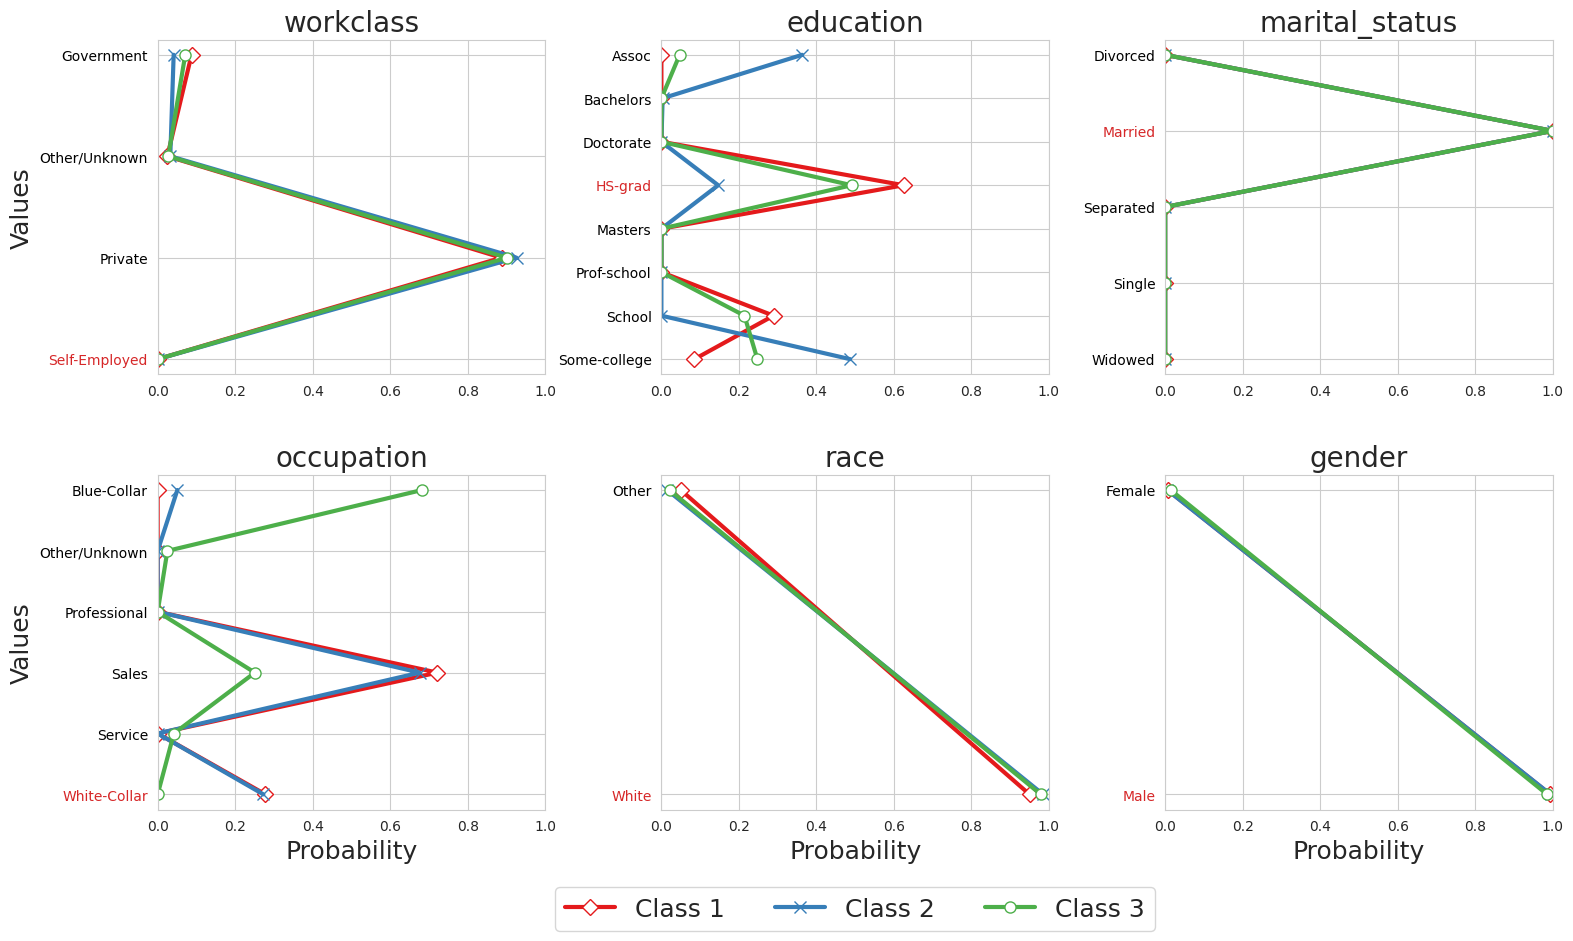

In [15]:
"""2 × 3 version"""

colors = sns.color_palette("Set1", n_colors=3)
markers = ["D", "x", "o", "*", "o"]
# labels = ["Class 1: 47%", "Class 2: 31%", "Class 3: 22%"]
labels = ["Class 1", "Class 2", "Class 3"]
header = ['workclass', 'education', 'marital_status', 'occupation', 'race', 'gender']

id_workclass = ['Government', 'Other/Unknown', 'Private', 'Self-Employed']
# SchoolとHs-gradが無い
id_education = ['Assoc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Prof-school', 'School', 'Some-college']
# SeparatedとWidowedが無い
id_marital_status = ['Divorced', 'Married', 'Separated', 'Single', 'Widowed']
# Blue-Collarが無い
id_occupation = ['Blue-Collar', 'Other/Unknown', 'Professional', 'Sales', 'Service', 'White-Collar']
id_race = ['Other', 'White']
id_gender = ['Female', 'Male']

sns.set_style("whitegrid")
plt.figure(figsize=(18, 10))
plt.subplots_adjust(wspace=.3, hspace=0.3)

for i, row in zip(range(1, 7), header):
    ax = plt.subplot(2, 3, i)
    for j in range(3): # クラス数
        if row == 'workclass':
            plt.plot(lca_df[lca_df.columns.tolist()[1:5]].iloc[j:j+1].values[0], list(reversed(range(4))), marker=markers[j], markerfacecolor='white', color=colors[j], label=labels[j], linewidth=3, markersize=8)
            plt.yticks(list(reversed(range(4))) ,id_workclass, fontsize=10)
            [t.set_color('tab:red') if k==3 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
        elif row == 'education': 
            plt.plot(lca_df[lca_df.columns.tolist()[5:13]].iloc[j:j+1].values[0], list(reversed(range(8))), marker=markers[j], markerfacecolor='white', color=colors[j], label=labels[j], linewidth=3, markersize=8)
            plt.yticks(list(reversed(range(8))) ,id_education, fontsize=10)
            [t.set_color('tab:red') if k==3 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
        elif row == 'marital_status': 
            plt.plot(lca_df[lca_df.columns.tolist()[13:18]].iloc[j:j+1].values[0], list(reversed(range(5))), marker=markers[j], markerfacecolor='white', color=colors[j], label=labels[j], linewidth=3, markersize=8)
            plt.yticks(list(reversed(range(5))) ,id_marital_status, fontsize=10)
            [t.set_color('tab:red') if k==1 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
        elif row == 'occupation': 
            plt.plot(lca_df[lca_df.columns.tolist()[18:24]].iloc[j:j+1].values[0], list(reversed(range(6))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3, markersize=8)
            plt.yticks(list(reversed(range(6))) ,id_occupation, fontsize=10)
            [t.set_color('tab:red') if k==5 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
        elif row == 'race': 
            plt.plot(lca_df[lca_df.columns.tolist()[24:26]].iloc[j:j+1].values[0], list(reversed(range(2))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3, markersize=8)
            plt.yticks(list(reversed(range(2))) ,id_race, fontsize=10)
            [t.set_color('tab:red') if k==1 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
        elif row == 'gender': 
            plt.plot(lca_df[lca_df.columns.tolist()[26:28]].iloc[j:j+1].values[0], list(reversed(range(2))), marker=markers[j], markerfacecolor='white', color=colors[j], linewidth=3, markersize=8)
            plt.yticks(list(reversed(range(2))) ,id_gender, fontsize=10)
            [t.set_color('tab:red') if k==1 else t.set_color('black') for k, t in enumerate(ax.yaxis.get_ticklabels())]
            plt.xlim(0, 1)
        plt.title(row, fontsize=20)
        if 4 <= i <= 6: plt.xlabel("Probability", fontsize=18)
        if i == 1 or i== 4: plt.ylabel("Values", fontsize=18)
        if i == 2: plt.legend(ncol=3, bbox_to_anchor=(0.5, -1.7), loc="lower center", prop={"size":18})
#plt.savefig("images/csv1_test0_1_1000_1_3.png")
#plt.tight_layout()
plt.show()

In [2]:
target_df = pd.read_csv("/workspace/Eval/lcr_result/adult_neg_6_age_63_hw_60.csv")
target_df.head()

,Unnamed: 0,V1,V2,V3
0,1,2.421911e-08,1.997363e-30,1.0
1,2,2.496013e-08,2.195754e-30,1.0
2,3,2.572382e-08,2.413851e-30,1.0
3,4,2.651088e-08,2.653610e-30,1.0
4,5,2.732201e-08,2.917184e-30,1.0


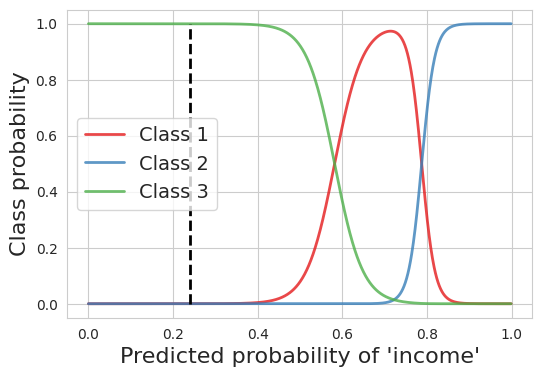

In [7]:
colors = sns.color_palette("Set1", n_colors=3)

sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
plt.plot(np.arange(0, 1, 0.001), target_df["V1"], color=colors[0], linewidth=2, alpha=0.8, label="Class 1")
plt.plot(np.arange(0, 1, 0.001), target_df["V2"], color=colors[1], linewidth=2, alpha=0.8, label="Class 2")
plt.plot(np.arange(0, 1, 0.001), target_df["V3"], color=colors[2], linewidth=2, alpha=0.8, label="Class 3")
# x = 0.24, y=[0.0, 1.0] の位置に縦線(点線)を引く
plt.vlines(0.24, 0.0, 1.0, linestyle="dashed", linewidth=2, color="black")
#plt.savefig("images/test0_1_class_income.png")
plt.xlabel("Predicted probability of 'income'", fontsize=16)
plt.ylabel("Class probability", fontsize=16)
plt.legend(prop={"size":14})
plt.show()